# Aggolomerative Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Milk Dataset

In [29]:
milk=pd.read_csv("milk.csv",index_col=0)

In [30]:
scaler=StandardScaler()
milkscaled=scaler.fit_transform(milk)

linkage_method="average"
clust=AgglomerativeClustering(n_clusters=3,linkage=linkage_method)#with number of 3 cluster
clust.fit(milkscaled)
print(clust.labels_)
print(silhouette_score(milkscaled,clust.labels_))

[2 2 2 2 2 2 2 2 0 0 2 2 2 0 2 2 0 2 0 0 0 0 0 1 1]
0.48757649189546187


In [31]:
scaler=StandardScaler()
milkscaled=scaler.fit_transform(milk)

linkage_method="average"
clust=AgglomerativeClustering(n_clusters=2,linkage=linkage_method)# With number of 2 cluster
clust.fit(milkscaled)
print(clust.labels_)
print(silhouette_score(milkscaled,clust.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
0.5186847578981009


In [32]:
# For Differnt Number OF Cluster[2,3,4,5]
milk=pd.read_csv("milk.csv",index_col=0)
scaler=StandardScaler()
milkscaled=scaler.fit_transform(milk)

for i in [2,3,4,5]:
    clust = AgglomerativeClustering(n_clusters=i,linkage='average')
    clust.fit(milkscaled)
    print(clust.labels_)
    print(silhouette_score(milkscaled,clust.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
0.5186847578981009
[2 2 2 2 2 2 2 2 0 0 2 2 2 0 2 2 0 2 0 0 0 0 0 1 1]
0.48757649189546187
[0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 2 1 2 2 2 3 3]
0.41601538367376095
[2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 1 4 0 1 0 0 0 3 3]
0.3830100222472541


In [33]:
scaler=StandardScaler()
milkscaled=scaler.fit_transform(milk)

linkage_method="average"
clust=KMeans(n_clusters=3)# With number of 2 cluster
clust.fit(milkscaled)
print(clust.labels_)
print(silhouette_score(milkscaled,clust.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 1 1]
0.5391595072079529


# Using K-Mean Clustering

In [39]:
# For Differnt Number OF Cluster[2,3,4,5]
milk=pd.read_csv("milk.csv",index_col=0)
scaler=StandardScaler()
milkscaled=scaler.fit_transform(milk)

for i in [2,3,4,5,6,7]:
    clust=KMeans(n_clusters=i)
    clust.fit(milkscaled)
    print(clust.labels_)
    print(silhouette_score(milkscaled,clust.labels_))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0]
0.5258508931703421
[1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 2 2 2 2 2 0 0]
0.48757649189546187
[0 0 0 0 0 0 0 3 3 3 3 0 0 3 0 3 3 0 1 1 1 1 1 2 2]
0.4355891993570169
[2 2 2 2 2 0 0 0 3 3 0 0 2 3 0 0 3 0 4 3 4 4 4 1 1]
0.40926029392635116
[0 0 0 0 0 5 5 5 1 1 5 5 0 1 5 5 1 5 3 4 4 4 4 2 2]
0.386462010908779
[6 6 6 6 6 1 1 1 3 3 1 1 6 3 1 1 3 5 2 4 4 4 4 0 0]
0.3987803295589405


In [40]:
Ks=[2,3,4,5,6,7]
scores=[]
for k in Ks:
    clust=KMeans(n_clusters=i)
    clust.fit(milkscaled)
    scores.append(silhouette_score(milkscaled,clust.labels_))
    
i_max=np.argmax(scores)
best_k=Ks[i_max]
print("Best Score:",scores[i_max])
print("Best No.of Clusters:",best_k)

Best Score: 0.3987803295589405
Best No.of Clusters: 2


In [44]:
clust = KMeans(n_clusters=3)
clust.fit(milkscaled)
print(clust.labels_)

milk_clust = milk.copy()
milk_clust['Clust'] = clust.labels_
milk_clust.sort_values('Clust')

#Centroids
milk_clust.groupby('Clust').mean()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 2 2]


,water,protein,fat,lactose,ash
Clust,,,,,
0,85.158824,4.235294,4.964706,5.147059,0.635294
1,69.266667,10.500000,16.066667,2.483333,1.566667
2,45.650000,10.150000,38.450000,0.450000,0.690000


Best Score :  0.8810549232046082
Best No. of clusters :  16


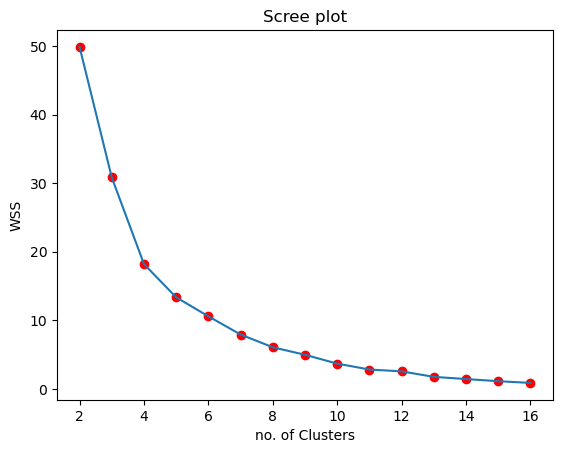

In [45]:
scores = []
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
for k in ks:
    clust = KMeans(n_clusters=k)
    clust.fit(milkscaled)
    scores.append(clust.inertia_)
    
i_min = np.argmin(scores)
best_k = ks[i_min]
print("Best Score : ", scores[i_min])
print("Best No. of clusters : ",best_k)

plt.scatter(ks,scores,c="red")
plt.plot(ks,scores)
plt.xlabel("no. of Clusters")
plt.ylabel("WSS")
plt.title("Scree plot")
plt.show()

# US Arrest

Best Score :  0.8229591719073736
Best No. of clusters :  16


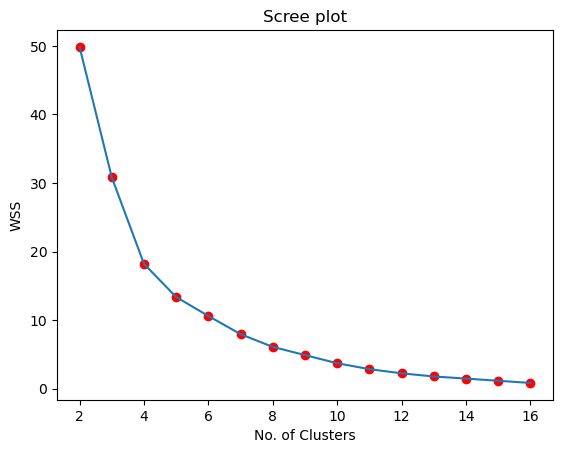

In [62]:
ua = pd.read_csv("USArrests.csv",index_col=0)
scaler = StandardScaler()
uascaled = scaler.fit_transform(ua)

clust = KMeans(n_clusters=3)
clust.fit(uascaled)

scores = []
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
for k in ks:
    clust = KMeans(n_clusters=k)
    clust.fit(milkscaled)
    scores.append(clust.inertia_)
    
i_min = np.argmin(scores)
best_k = ks[i_min]
print("Best Score : ", scores[i_min])
print("Best No. of clusters : ",best_k)

plt.scatter(ks,scores,c="red")
plt.plot(ks,scores)
plt.xlabel("No. of Clusters")
plt.ylabel("WSS")
plt.title("Scree plot")
plt.show()

In [64]:
# Loop For tuning

eps=[0.5,0.8,1,1.5]
min_pts=[3,2,4]
params=[]
for e in eps:
    for m in min_pts:
        clust=DBSCAN(eps=e,min_samples=m)
        clust.fit(uascaled)
        uascale=pd.DataFrame(uascaled,columns=ua.columns) 
        ua_clust=uascale.copy()
        ua_clust['Clust']=clust.labels_
        ua_clust_wo=ua_clust[ua_clust['Clust']>-1]
        if len (ua_clust_wo['Clust'].unique())>1:
            score=silhouette_score(ua_clust_wo.iloc[:,:-1],ua_clust_wo['Clust'])
            params.append([e,m,score])
print(params)
        

[[0.5, 2, 0.6481878697705626], [0.8, 3, 0.3181176425374543], [0.8, 2, 0.3279344306871734], [1, 3, 0.3395677965591881], [1, 2, 0.3395677965591881], [1, 4, 0.4160914171480962]]


# DBSCAN

In [4]:
from sklearn.cluster import DBSCAN

In [54]:
milk=pd.read_csv("milk.csv",index_col=0)

In [55]:
sacler=StandardScaler()
milkscaled=scaler.fit_transform(milk)
clust=DBSCAN(eps=0.5,min_samples=3)
clust.fit(milkscaled)
print(clust.labels_)

[ 0  0  0  0 -1  2  2  1 -1 -1  1  2  0 -1  2  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1]


In [56]:
milkscaled=pd.DataFrame(milkscaled,columns=milk.columns)
milk_clust=milkscaled.copy()
milk_clust['Clust']=clust.labels_
milk_clust_wo=milk_clust[milk_clust['Clust']>-1]
print(silhouette_score(milk_clust_wo.iloc[:,:-1],milk_clust_wo['Clust']))

0.5344431042454363


In [59]:
# Loop For tuning

eps=[0.5,0.8,1,1.5]
min_pts=[3,2,4]
params=[]
for e in eps:
    for m in min_pts:
        clust=DBSCAN(eps=e,min_samples=m)
        clust.fit(milkscaled)
        milk_clust=milkscaled.copy()
        milk_clust['Clust']=clust.labels_
        milk_clust_wo=milk_clust[milk_clust['Clust']>-1]
        if len (milk_clust_wo['Clust'].unique())>1:
            score=silhouette_score(milk_clust_wo.iloc[:,:-1],milk_clust_wo['Clust'])
            params.append([e,m,score])
print(params)
        

[[0.5, 3, 0.5344431042454363], [0.5, 2, 0.5934459505692155], [0.8, 3, 0.5330377521235296], [0.8, 2, 0.46467391846010603], [0.8, 4, 0.4571511833668322], [1, 3, 0.6473871775367226], [1, 2, 0.4344818095328392], [1.5, 2, 0.5528890106341011]]


# Assignment On Clustering

# 1.	Consider the dataset Datasets/nutrient.csv. Do the following:
a.	With sklearn agglomerative clustering find best number of clusters based on Silhouette Score

b.	With sklearn k-means clustering find best number of clusters based on Silhouette Score

c.	With sklearn k-means clustering find best number of clusters based on Elbow method with WSS


In [65]:
nutrient=pd.read_csv("nutrient.csv",index_col=0)

In [68]:
scaler=StandardScaler()
nutrientscaled=scaler.fit_transform(nutrient)

scaler=StandardScaler()
nutrientscaled=scaler.fit_transform(nutrient)

for i in [2,3,4,5]:
    clust = AgglomerativeClustering(n_clusters=i,linkage='average')
    clust.fit(nutrientscaled)
    print(clust.labels_)
    print(silhouette_score(nutrientscaled,clust.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
0.41345065968561695
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 1 0 0]
0.44531853755129397
[0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 1 0 0]
0.3311159158397946
[1 0 1 1 0 0 0 3 0 1 1 1 1 0 0 0 2 2 0 0 0 0 0 0 4 0 0]
0.4000030856637424


In [70]:
scaler=StandardScaler()
nutrientscaled=scaler.fit_transform(nutrient)

scaler=StandardScaler()
nutrientscaled=scaler.fit_transform(nutrient)
for i in [2,3,4,5,6,7]:
    clust=KMeans(n_clusters=i)
    clust.fit(nutrientscaled)
    print(clust.labels_)
    print(silhouette_score(nutrientscaled,clust.labels_))

[1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.32577846240602615
[1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 2 2 0 0 0 0 0 0 0 0 0]
0.4037719788150674
[2 0 2 2 0 0 0 0 2 2 2 2 2 0 0 0 3 3 0 0 0 1 0 1 1 0 0]
0.41997441967765275
[2 1 2 2 1 0 1 1 2 2 2 2 2 1 1 0 3 3 0 0 0 0 0 0 4 1 1]
0.39418262779112107
[0 2 0 0 2 2 2 5 0 0 0 0 0 2 2 2 4 4 1 1 2 1 1 1 3 2 2]
0.3814688639441237
[1 2 1 1 2 5 2 6 1 1 1 1 1 5 2 2 3 3 5 5 5 0 5 0 4 2 2]
0.3863055806472059


Best Score :  16.591253402778843
Best No. of clusters :  16


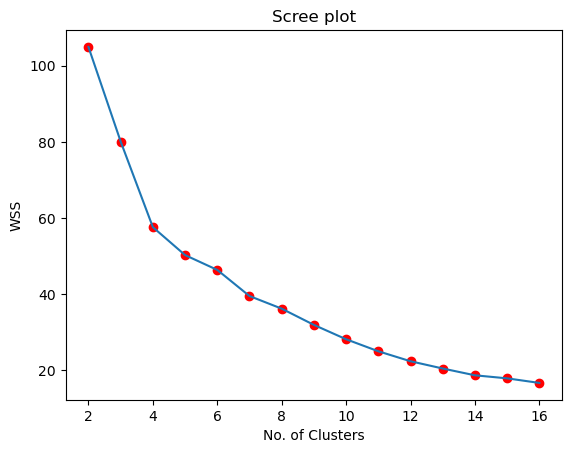

In [71]:
scaler = StandardScaler()
nutrientscaled = scaler.fit_transform(ua)

clust = KMeans(n_clusters=3)
clust.fit(nutrientscaled)

scores = []
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
for k in ks:
    clust = KMeans(n_clusters=k)
    clust.fit(nutrientscaled)
    scores.append(clust.inertia_)
    
i_min = np.argmin(scores)
best_k = ks[i_min]
print("Best Score : ", scores[i_min])
print("Best No. of clusters : ",best_k)

plt.scatter(ks,scores,c="red")
plt.plot(ks,scores)
plt.xlabel("No. of Clusters")
plt.ylabel("WSS")
plt.title("Scree plot")
plt.show()

# 2.	Consider the dataset Datasets/USArrests.csv. Do the following:
a.	With sklearn agglomerative clustering find best number of clusters based on Silhouette Score

b.	With sklearn k-means clustering find best number of clusters based on Silhouette Score


In [82]:
ua = pd.read_csv("USArrests.csv",index_col=0)
scaler = StandardScaler()
uascaled = scaler.fit_transform(ua)


scores = []
ks = [2,3,4,5,6,7]
for k in ks:
    clust=AgglomerativeClustering(n_clusters=k,linkage=linkage_method)#with number of 3 cluster
    clust.fit(uascaled )
    print(clust.labels_)
    print(silhouette_score(uascaled ,clust.labels_))

[0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1]
0.4084890326217641
[0 2 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1]
0.34863679190476177
[3 2 1 0 1 1 0 0 1 3 0 0 1 0 0 0 0 3 0 1 0 1 0 3 1 0 0 1 0 0 1 1 3 0 0 0 0
 0 0 3 0 3 1 0 0 0 0 0 0 0]
0.3636819420151221
[3 2 1 0 1 1 0 0 1 3 0 0 1 0 4 0 0 3 4 1 0 1 0 3 1 0 0 1 4 0 1 1 3 4 0 0 0
 0 0 3 4 3 1 0 4 0 0 4 0 0]
0.3212682619092323
[3 5 0 1 0 0 1 2 0 3 1 1 0 1 4 1 1 3 4 0 2 0 1 3 0 1 1 0 4 2 0 0 3 4 1 1 1
 1 2 3 4 3 0 1 4 1 1 4 1 1]
0.2719787783719339
[3 5 1 0 6 1 0 2 1 3 0 0 1 0 4 0 0 3 4 1 2 1 0 3 1 0 0 6 4 2 1 1 3 4 0 0 0
 0 2 3 4 3 1 0 4 0 0 4 0 0]
0.2507421522912214


In [83]:
ua = pd.read_csv("USArrests.csv",index_col=0)
scaler = StandardScaler()
uascaled = scaler.fit_transform(ua)

clust = KMeans(n_clusters=3)
clust.fit(uascaled)

scores = []
ks = [2,3,4,5,6,7]
for k in ks:
    clust = KMeans(n_clusters=k)
    clust.fit(uascaled)
    print(clust.labels_)
    print(silhouette_score(uascaled ,clust.labels_))


[1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0]
0.4084890326217641
[1 1 1 2 1 1 0 0 1 1 0 2 1 0 2 0 2 1 2 1 0 1 2 1 1 2 2 1 2 0 1 1 1 2 0 0 0
 0 0 1 2 1 1 0 2 0 0 2 2 0]
0.30813622648945616
[3 1 1 3 1 1 2 2 1 3 2 0 1 2 0 2 0 3 0 1 2 1 0 3 1 0 0 1 0 2 1 1 3 0 2 2 2
 2 2 3 0 3 1 2 0 2 2 0 0 2]
0.33968891433344395
[3 1 1 2 1 1 4 4 1 3 4 0 1 2 0 2 2 3 0 1 4 1 0 3 1 2 2 1 0 4 1 1 3 0 4 2 2
 4 4 3 0 3 1 4 0 2 4 0 0 2]
0.2968626678243933
[2 5 1 0 5 5 4 4 1 2 4 3 1 0 3 0 0 2 3 1 4 1 0 2 1 0 0 5 3 4 1 1 2 3 0 0 0
 0 4 2 3 2 1 4 3 0 0 3 3 0]
0.28040292439450826
[6 2 5 3 4 4 0 0 5 6 0 1 5 3 1 3 3 6 1 5 0 5 1 6 3 1 1 4 1 0 5 5 6 1 0 3 3
 0 0 6 1 6 5 0 1 3 0 1 1 3]
0.2863001804759888


# 3.	Consider the dataset in Cases/ Recency Frequency Monetary folder. Considering the columns revenue, number of orders and recency days. Do the following:
a.	With sklearn k-means clustering find best number of clusters based on Silhouette Score. Try to interpret the cluster centroids

b.	Do DBSCAN clustering and find best epsilon and min points.


In [90]:
cust=pd.read_csv("rfm_data_customer.csv",index_col=0) 

In [91]:
cust=cust.drop('most_recent_visit',axis=1)
scaler=StandardScaler()
custscaled=scaler.fit_transform(cust)


Ks=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
scores=[]
for k in Ks:
    clust=KMeans(n_clusters=k,random_state=23)
    clust.fit(custscaled)
    scores.append(silhouette_score(custscaled,clust.labels_))
    
i_max=np.argmax(scores)
best_k=Ks[i_max]
print("Best Score:",scores[i_max])
print("Best No.of Clusters:",best_k)
clust = KMeans(n_clusters=best_k)
clust.fit(custscaled)
print(clust.labels_)

Best Score: 0.3707186478145492
Best No.of Clusters: 3
[2 1 2 ... 2 2 1]


In [5]:
rfm1= pd.read_csv("rfm_data_customer.csv",index_col=0)
rfm=rfm1.drop(['most_recent_visit'],axis=1)
scaler=StandardScaler()

rfm_scaled=scaler.fit_transform(rfm)
rfm_scaled=pd.DataFrame(rfm_scaled,columns=rfm.columns)
epsilon=[(0.1,2)]
params=[]
for e in epsilon:
        
        clust=DBSCAN(eps=e[0],min_samples=e[1])
        clust.fit(rfm_scaled)
        rfm_clust=rfm_scaled.copy()
        rfm_clust['Clust']=clust.labels_
        rfm_clust_wo=rfm_clust[rfm_clust['Clust']>-1] 
        if len(rfm_clust_wo['Clust'].unique())>1:
            score=silhouette_score(rfm_clust_wo.iloc[:,:-1],rfm_clust_wo['Clust'] )
            params.append([e[0],e[1],score])
            
pd_results= pd.DataFrame(params,columns=['eps','min','score'])

In [87]:
import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori,association_rules

In [88]:
fp_df=pd.read_csv("Cosmetics.csv",index_col=0)
fp_df=fp_df.astype(bool)
itemsets=apriori(fp_df,min_support=0.005,use_colnames=True)
rules=association_rules(itemsets,min_threshold=0.8)
rules=rules[['antecedents','consequents','support','confidence','lift']]
print(rules)

                                             antecedents  \
0                                              (Brushes)   
1                                              (Mascara)   
2                                           (Eye shadow)   
3                                         (Brushes, Bag)   
4                                         (Bronzer, Bag)   
...                                                  ...   
20485  (Eyeliner, Blush, Foundation, Lip liner, Bronz...   
20486  (Eyeliner, Lip Gloss, Blush, Foundation, Lip l...   
20487  (Eyeliner, Blush, Foundation, Eye shadow, Lip ...   
20488  (Eyeliner, Blush, Foundation, Lip liner, Bronz...   
20489  (Eyeliner, Blush, Foundation, Lip liner, Brush...   

                                             consequents  support  confidence  \
0                                          (Nail Polish)    0.149    1.000000   
1                                           (Eye shadow)    0.321    0.899160   
2                                   

# Imputation

In [93]:
import pandas as pd
from sklearn.impute import SimpleImputer


data={'A':[1,2,None,4,5],
     'B':[10,None,30,40,50]}
df=pd.DataFrame(data)

imputer=SimpleImputer(strategy='most_frequent')# Null Values Filling With Mode
df_imputed=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
print(df)

     A     B
0  1.0  10.0
1  2.0   NaN
2  NaN  30.0
3  4.0  40.0
4  5.0  50.0


In [94]:
print(df_imputed)

     A     B
0  1.0  10.0
1  2.0  10.0
2  1.0  30.0
3  4.0  40.0
4  5.0  50.0


In [97]:
imputer=SimpleImputer(strategy='mean')# Null Value Filling with Mean
df_imputed=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
print(df_imputed)

     A     B
0  1.0  10.0
1  2.0  32.5
2  3.0  30.0
3  4.0  40.0
4  5.0  50.0


In [98]:
imputer=SimpleImputer(strategy='median')# Null Value Filling with Mean
df_imputed=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
print(df_imputed)

     A     B
0  1.0  10.0
1  2.0  35.0
2  3.0  30.0
3  4.0  40.0
4  5.0  50.0


In [99]:
imputer=SimpleImputer()# If we not given any stratergy value then bydefault it fill with the mean 
df_imputed=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
print(df_imputed)

     A     B
0  1.0  10.0
1  2.0  32.5
2  3.0  30.0
3  4.0  40.0
4  5.0  50.0


In [6]:
from mlxtend.preprocessing import TransactionEncoder

In [13]:
groceries=[]
with open("groceries.csv","r") as f:groceries = f.read()
groceries = groceries.split("\n")
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

te = TransactionEncoder()
te_ary = te.fit(groceries_list).transform(groceries_list)
fp_df = pd.DataFrame(te_ary,columns = te.columns_)